# Credit Card Fraud Detection Classification
## This project uses the credit card transaction data to build models for classifiy fraud transations. The data can be accessed on [Kaggle](https://www.kaggle.com/datasets/kelvinkelue/credit-card-fraud-prediction)

### Import basic packages

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Prelimineary Data Inspection

In [65]:
fraud = pd.read_csv('fraud_test.csv')

In [66]:
# inspect the dataset
fraud.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [67]:
# print how many observations and features the dataset has
print(f'There are {fraud.shape[0]} observations and {fraud.shape[1]} features in the dataset')

There are 555719 observations and 23 features in the dataset


In [68]:
# examine if the dataset has any null values
print(f'There are {fraud.isna().sum().sum()} non-available values')
print(f'There are {fraud.isnull().sum().sum()} null values')

There are 0 non-available values
There are 0 null values


In [69]:
fraud.info()
# according to the table and dataset info returned, the features "trans_date_trans_time" and "dob" should be converted into the datatime datatype. The first columns should be dropped.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

### Data Cleaning and Wrangling

In [70]:
# the first column is only index numbers, which cannot have implications for the classification task. Therefore, it is dropped.
fraud.drop('Unnamed: 0', axis = 1, inplace = True)

In [71]:
# transform date data
fraud['trans_date_trans_time'] = pd.to_datetime(fraud['trans_date_trans_time'])
fraud['dob'] = pd.to_datetime(fraud['dob'],  format='%d/%m/%Y')

Based on common sense, it is highly unlikely that a customer's personal information, such as identificaton number, name, and dob, is associated with a fraud given it is naturally unique for each person and cannot be generalsied. Therefore, they should be dropped to simply the model. However, it may be suggested that a person's age is associated a fraud. Therefore, the 'dob' should be further transformed instead of being dropped directly.

In [72]:
fraud['dob_year'] = fraud['dob'].dt.year


fraud.drop(['first', 'last', 'dob', 'cc_num'], axis = 1, inplace = True)

In [73]:
for feature in fraud.columns[:-1]:
    unique_num = fraud[feature].nunique()
    print(f"There are {unique_num} unique values for the feature '{feature}'")

There are 226976 unique values for the feature 'trans_date_trans_time'
There are 693 unique values for the feature 'merchant'
There are 14 unique values for the feature 'category'
There are 37256 unique values for the feature 'amt'
There are 2 unique values for the feature 'gender'
There are 924 unique values for the feature 'street'
There are 849 unique values for the feature 'city'
There are 50 unique values for the feature 'state'
There are 912 unique values for the feature 'zip'
There are 910 unique values for the feature 'lat'
There are 910 unique values for the feature 'long'
There are 835 unique values for the feature 'city_pop'
There are 478 unique values for the feature 'job'
There are 555719 unique values for the feature 'trans_num'
There are 544760 unique values for the feature 'unix_time'
There are 546490 unique values for the feature 'merch_lat'
There are 551770 unique values for the feature 'merch_long'
There are 2 unique values for the feature 'is_fraud'


Given the features "trans_num", "unix_time", "merch_lat", "march_long" have almost as many values as the number of observations, they can be considered "high-cadrinality" features, which do not provide useful information for prediction as they do not help the model to generalise. Therefore, they should be dropped.

In [74]:
# drop the 'high-cadrinality' features
fraud.drop(['trans_num', 'unix_time', 'merch_lat', 'merch_long'], axis = 1, inplace = True)

However, the "trans_date_trans_time" feature still has many unique values, which may imply its weak capability to generalise a pattern for the model. It should be further examined to see if there are more methods to make the pattern related to time more apprent.

In [75]:
# the "trans_date_trans_time" feature is separated into year, month, day, and time to simply it. However, minute and second are too minute to have any implications for the model. Therefore, they are ignored in the model.
fraud['year'] = fraud['trans_date_trans_time'].dt.year
fraud['month'] = fraud['trans_date_trans_time'].dt.month
fraud['day'] = fraud['trans_date_trans_time'].dt.day
fraud['hour'] = fraud['trans_date_trans_time'].dt.hour

fraud.drop('trans_date_trans_time', axis = 1, inplace = True)

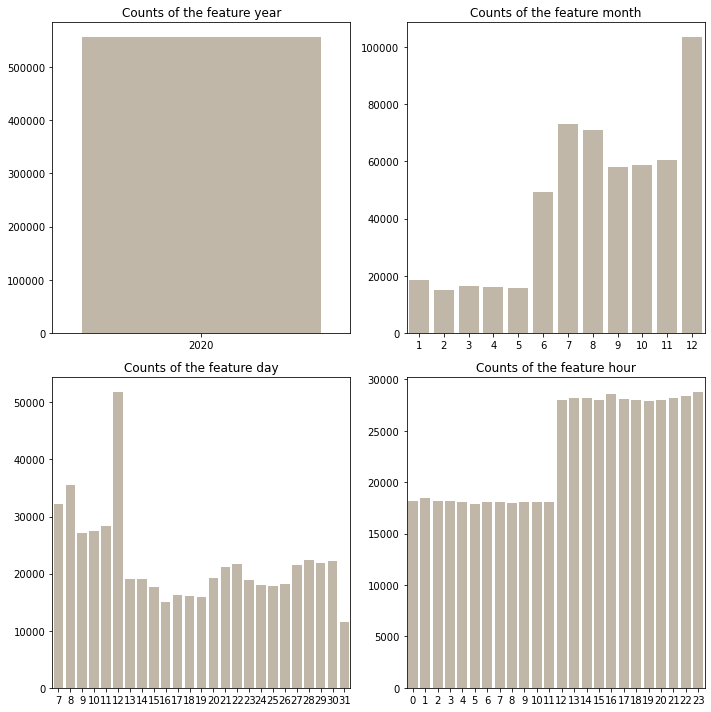

In [76]:
positions = []
for i in range(0, 2):
    for j in range(0, 2):
        position = [i, j]
        positions.append(position)

time_count, axes = plt.subplots(2, 2, figsize = (10, 10))

for feature, i, position in zip(fraud.columns[-4:], range(0, 4), positions):
    sns.countplot(x = feature, data = fraud, ax = axes[position[0], position[1]], color = '#c5b8a5')
    axes[position[0], position[1]].set_title(f'Counts of the feature {feature}')
    axes[position[0], position[1]].set_xlabel('')
    axes[position[0], position[1]].set_ylabel('')


plt.tight_layout()
plt.show()

In [77]:
# according to the plots generated above, the 'year' and 'second' features only contain 1 value, which does not help the model to generalise. Therefore, they should be dropped.
fraud.drop('year', axis = 1, inplace = True)

# also, given every value in 'year' is 2020, it is assumed that the data collection has been conducted in 2020, which can be used to calculate a customer's age, which is a more proper predictor than a custmoer's year of birth as a continuous variable
fraud['age'] = 2020 - fraud['dob_year']
fraud.drop('dob_year', axis = 1, inplace = True)

In [78]:
# given the nature of geographical information, lat and lon can already represent the basic gregraphical information, such as street, city, zip. Therefore, these geographical informatiion is dropped to simplify the model and avoid overfitting
fraud.drop(['street', 'city', 'zip'], axis = 1, inplace = True)

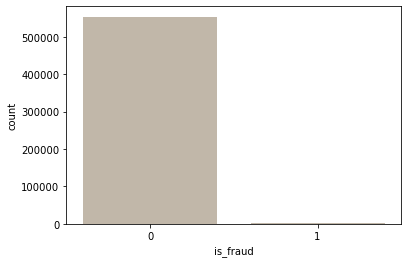

0    553574
1      2145
Name: is_fraud, dtype: int64


In [79]:
# examine the distribution of the outcome
sns.countplot(x = 'is_fraud', data = fraud, color = '#c5b8a5')
plt.show()

print(fraud['is_fraud'].value_counts())

According to the plot and info returned above, the dataset is highly imblanced. Downsampling of the majority class is required.

In [80]:
fraud = pd.get_dummies(fraud, columns = ['merchant', 'category', 'gender', 'state', 'job', 'month', 'day', 'hour'], prefix = ['merchant', 'category', 'state', 'gender', 'job', 'month', 'day', 'hour'], drop_first = True)

### Preperation for Model Construction

#### Splitting Dataset

In [81]:
X = fraud.drop('is_fraud', axis = 1)
y = fraud['is_fraud']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 517, stratify = y)

In [82]:
y_train.value_counts()
# The train dataset is still imbalanced. 

0    332144
1      1287
Name: is_fraud, dtype: int64

#### Downsampling the Training Set

In [83]:
# oversapling to balance the data
from imblearn.over_sampling import RandomOverSampler

rus = RandomOverSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

In [84]:
y_train_res.value_counts()

0    332144
1    332144
Name: is_fraud, dtype: int64

#### Scaling the Data for Logistic Regression

In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

### Build the Model and Evaluate the Performance

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

logistic = LogisticRegression(max_iter = 1e5, solver = 'lbfgs')
logistic.fit(X_train_res_scaled, y_train_res)

logistic_training_score = logistic.score(X_train_res_scaled, y_train_res)
print(f'The performance of the logistic regression on the training set is{logistic_training_score: 2f}')

y_pred_log = logistic.predict(X_test_scaled)
logistic_performace = accuracy_score(y_test, y_pred_log)
print(f'The performance of the logistic regression on the test set is{logistic_performace: 2f}')

print('\n')

rf = RandomForestClassifier()
rf.fit(X_train_res, y_train_res)
rf_training_score = rf.score(X_train_res, y_train_res)
print(f'The performance of the random forest on the training set is{rf_training_score: 2f}')

y_pred_rf = rf.predict(X_test)
rf_performance = accuracy_score(y_test, y_pred_rf)
print(f'The performance of the random forest on the test set is{rf_performance: 2f}')

The performance of the logistic regression on the training set is 0.980510
The performance of the logistic regression on the test set is 0.959089


The performance of the random forest on the training set is 1.000000
The performance of the random forest on the test set is 0.998214


##### Both models perform well on the training set and test set, indicating that they are valid models to determine if a transation is a fraud or not. But between the two models, the random forest classifer is better in terms of its accuracy score as compared to the logistic regression